<a href="https://colab.research.google.com/github/BFvandy/Nissan-Text-Mining-POC-with-Transformer/blob/main/Reddit_Plotting_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prep

In [30]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import os
cur_path = "/content/drive/My Drive/Nissan Internship/Reddit Comments"
os.chdir(cur_path)
!pwd

/content/drive/My Drive/Nissan Internship/Reddit Comments


# Load Dataset & adjujst

In [33]:
cmt_final = pd.read_csv('reddit_score_v1.csv')

In [34]:
cmt_final

,Make,Model,Source,Text,timestamp,dependable,lasts long,value for money,quality fit and finish,attractive styling,...,responsible,confident,innovative,exciting,practical,adventurous,passionate,distinctive,youthful,aggressive
0,Nissan,Rogue,Reddit,This is incredible timing for me as my cvt jus...,1.659024e+09,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Nissan,Rogue,Reddit,Op do you own it out right? i'd sell it or tra...,1.659036e+09,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Nissan,Rogue,Reddit,I have 2019 sport transmission failed at 42k m...,1.659033e+09,0.187838,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Nissan,Rogue,Reddit,Not yet. but i bought an extended warranty any...,1.659030e+09,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Nissan,Rogue,Reddit,My 2016 maxima cvt took a shit at 85k miles lu...,1.659037e+09,0.310584,0.000000,0.0,0.0,0.0,...,0.978874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28376,Toyota,RAV4,Reddit,"I would maybe wait for the fall, just so your ...",1.625451e+09,0.000000,0.863397,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28377,Toyota,RAV4,Reddit,Yeah i probably will just wait until september...,1.625464e+09,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28378,Toyota,RAV4,Reddit,Change it.,1.637008e+09,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28379,Toyota,RAV4,Reddit,Did plenty of drain and fills on higher mileag...,1.637016e+09,0.938793,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
cmt_final.replace(0, np.nan, inplace=True)
# replace 0 with nan

In [36]:
cmt_final

,Make,Model,Source,Text,timestamp,dependable,lasts long,value for money,quality fit and finish,attractive styling,...,responsible,confident,innovative,exciting,practical,adventurous,passionate,distinctive,youthful,aggressive
0,Nissan,Rogue,Reddit,This is incredible timing for me as my cvt jus...,1.659024e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nissan,Rogue,Reddit,Op do you own it out right? i'd sell it or tra...,1.659036e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nissan,Rogue,Reddit,I have 2019 sport transmission failed at 42k m...,1.659033e+09,0.187838,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nissan,Rogue,Reddit,Not yet. but i bought an extended warranty any...,1.659030e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nissan,Rogue,Reddit,My 2016 maxima cvt took a shit at 85k miles lu...,1.659037e+09,0.310584,NaN,NaN,NaN,NaN,...,0.978874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28376,Toyota,RAV4,Reddit,"I would maybe wait for the fall, just so your ...",1.625451e+09,NaN,0.863397,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28377,Toyota,RAV4,Reddit,Yeah i probably will just wait until september...,1.625464e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28378,Toyota,RAV4,Reddit,Change it.,1.637008e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28379,Toyota,RAV4,Reddit,Did plenty of drain and fills on higher mileag...,1.637016e+09,0.938793,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#pd.isna(cmt_final['passionate'][i]):
#check if an element is nan

In [81]:
cmt_final_fun = cmt_final.iloc[:,:22]
cmt_final_fun = cmt_final_fun.drop('timestamp', axis=1)
cmt_final_fun

,Make,Model,Source,Text,dependable,lasts long,value for money,quality fit and finish,attractive styling,safe,...,driver comfort,fun to drive,advanced features,responsive handling,prestigious,dealerships,fuel efficient,quick acceleration,environmentally friendly,affordable
0,Nissan,Rogue,Reddit,This is incredible timing for me as my cvt jus...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nissan,Rogue,Reddit,Op do you own it out right? i'd sell it or tra...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nissan,Rogue,Reddit,I have 2019 sport transmission failed at 42k m...,0.187838,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nissan,Rogue,Reddit,Not yet. but i bought an extended warranty any...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nissan,Rogue,Reddit,My 2016 maxima cvt took a shit at 85k miles lu...,0.310584,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28376,Toyota,RAV4,Reddit,"I would maybe wait for the fall, just so your ...",NaN,0.863397,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28377,Toyota,RAV4,Reddit,Yeah i probably will just wait until september...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28378,Toyota,RAV4,Reddit,Change it.,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28379,Toyota,RAV4,Reddit,Did plenty of drain and fills on higher mileag...,0.938793,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.831673


In [82]:
cmt_final_pers = cmt_final.drop(cmt_final.iloc[:,4:22], axis=1)
cmt_final_pers

,Make,Model,Source,Text,trusted,leader,responsible,confident,innovative,exciting,practical,adventurous,passionate,distinctive,youthful,aggressive
0,Nissan,Rogue,Reddit,This is incredible timing for me as my cvt jus...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nissan,Rogue,Reddit,Op do you own it out right? i'd sell it or tra...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nissan,Rogue,Reddit,I have 2019 sport transmission failed at 42k m...,0.584861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nissan,Rogue,Reddit,Not yet. but i bought an extended warranty any...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nissan,Rogue,Reddit,My 2016 maxima cvt took a shit at 85k miles lu...,NaN,NaN,0.978874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28376,Toyota,RAV4,Reddit,"I would maybe wait for the fall, just so your ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28377,Toyota,RAV4,Reddit,Yeah i probably will just wait until september...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28378,Toyota,RAV4,Reddit,Change it.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28379,Toyota,RAV4,Reddit,Did plenty of drain and fills on higher mileag...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_count = cmt_final.count()
df_count
# count how many values are there (not NaN values)

Make                        28381
Model                       28381
Source                      28381
Text                        28281
timestamp                   28381
dependable                   1481
lasts long                   1806
value for money               934
quality fit and finish       1404
attractive styling            791
safe                          769
retains resale value          510
driver comfort               1013
fun to drive                  480
advanced features            1272
responsive handling           992
prestigious                  1177
dealerships                  1186
fuel efficient                937
quick acceleration            410
environmentally friendly      466
affordable                    839
trusted                       882
leader                        401
responsible                  2379
confident                     997
innovative                    962
exciting                      851
practical                    1750
adventurous   

# Correlation heatmap

In [39]:
# 17 functional attributes

fun_corr = cmt_final.iloc[:, 5:22]
fun_corr.corr()

,dependable,lasts long,value for money,quality fit and finish,attractive styling,safe,retains resale value,driver comfort,fun to drive,advanced features,responsive handling,prestigious,dealerships,fuel efficient,quick acceleration,environmentally friendly,affordable
dependable,1.000000,0.500060,0.689578,0.711187,0.636999,0.797272,0.602403,0.541438,0.630514,0.172867,0.679066,0.527401,0.517692,0.594036,0.197321,0.595431,0.578715
lasts long,0.500060,1.000000,0.432046,0.366321,0.295540,0.271237,0.551961,0.171142,0.363823,0.221248,0.311560,0.387181,0.158157,0.364897,0.161017,0.386236,0.298930
value for money,0.689578,0.432046,1.000000,0.776259,0.722579,0.640998,0.745526,0.564632,0.677616,0.315280,0.692928,0.639058,0.651858,0.610497,0.140183,0.733946,0.768486
quality fit and finish,0.711187,0.366321,0.776259,1.000000,0.832675,0.682059,0.728358,0.687604,0.744114,0.473034,0.753747,0.688016,0.671974,0.639981,0.179586,0.699951,0.542313
attractive styling,0.636999,0.295540,0.722579,0.832675,1.000000,0.680604,0.644978,0.706591,0.866191,0.454833,0.742521,0.707975,0.527846,0.629359,0.243884,0.692695,0.564881
safe,0.797272,0.271237,0.640998,0.682059,0.680604,1.000000,0.612234,0.629598,0.661540,0.055694,0.632940,0.353084,0.562337,0.633418,0.162010,0.732950,0.629321
retains resale value,0.602403,0.551961,0.745526,0.728358,0.644978,0.612234,1.000000,0.412386,0.600106,0.246258,0.682548,0.536471,0.583337,0.539522,0.155410,0.674666,0.590602
driver comfort,0.541438,0.171142,0.564632,0.687604,0.706591,0.629598,0.412386,1.000000,0.696249,0.369000,0.629369,0.416962,0.423591,0.606392,0.200278,0.625431,0.439732
fun to drive,0.630514,0.363823,0.677616,0.744114,0.866191,0.661540,0.600106,0.696249,1.000000,0.363495,0.732194,0.539738,0.507195,0.520766,0.253223,0.646334,0.517660
advanced features,0.172867,0.221248,0.315280,0.473034,0.454833,0.055694,0.246258,0.369000,0.363495,1.000000,0.427168,0.562351,0.065194,0.246645,0.289331,0.162145,0.140576


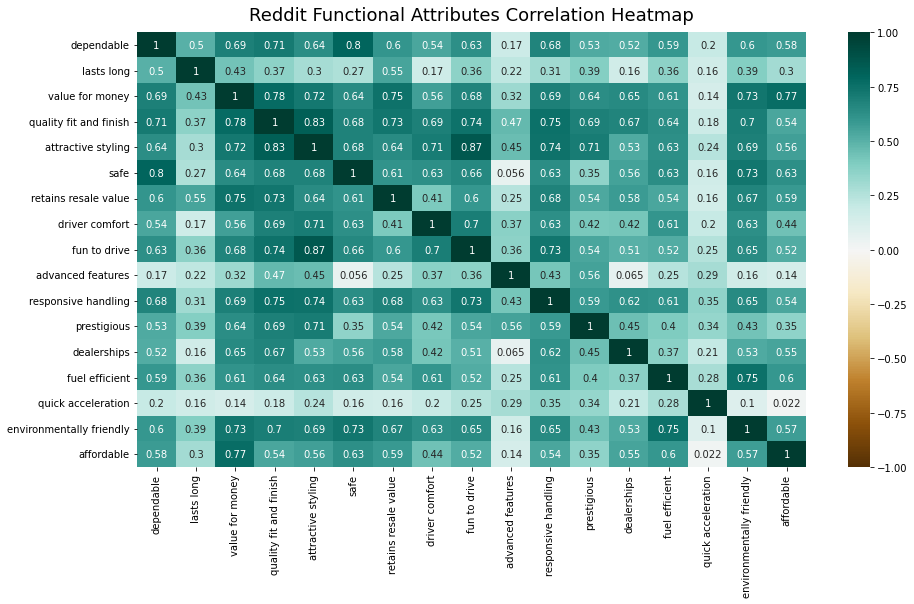

In [42]:
plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(fun_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Reddit Functional Attributes Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped

In [45]:
# save heatmap as .png file
plt.savefig('Reddit_functional_heatmap.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [40]:
#12 personality attributes
pers_corr = cmt_final.iloc[:, 23:34]
pers_corr.corr()

,leader,responsible,confident,innovative,exciting,practical,adventurous,passionate,distinctive,youthful,aggressive
leader,1.000000,0.477827,0.445258,0.384130,0.492691,0.339081,0.304509,0.521188,0.425371,0.233510,0.399461
responsible,0.477827,1.000000,0.379449,0.465052,0.488610,0.630629,0.402337,0.493039,0.397151,0.211472,0.120057
confident,0.445258,0.379449,1.000000,0.283988,0.519069,0.514026,0.094617,0.401653,0.378997,0.407555,0.037729
innovative,0.384130,0.465052,0.283988,1.000000,0.734140,0.411633,0.723936,0.522020,0.657365,0.244485,0.303076
exciting,0.492691,0.488610,0.519069,0.734140,1.000000,0.535711,0.700965,0.684574,0.633316,0.276518,0.297907
practical,0.339081,0.630629,0.514026,0.411633,0.535711,1.000000,0.276501,0.420441,0.346045,0.276990,-0.027581
adventurous,0.304509,0.402337,0.094617,0.723936,0.700965,0.276501,1.000000,0.608448,0.590568,0.208697,0.484646
passionate,0.521188,0.493039,0.401653,0.522020,0.684574,0.420441,0.608448,1.000000,0.548758,0.253729,0.466316
distinctive,0.425371,0.397151,0.378997,0.657365,0.633316,0.346045,0.590568,0.548758,1.000000,0.169974,0.368914
youthful,0.233510,0.211472,0.407555,0.244485,0.276518,0.276990,0.208697,0.253729,0.169974,1.000000,-0.079202


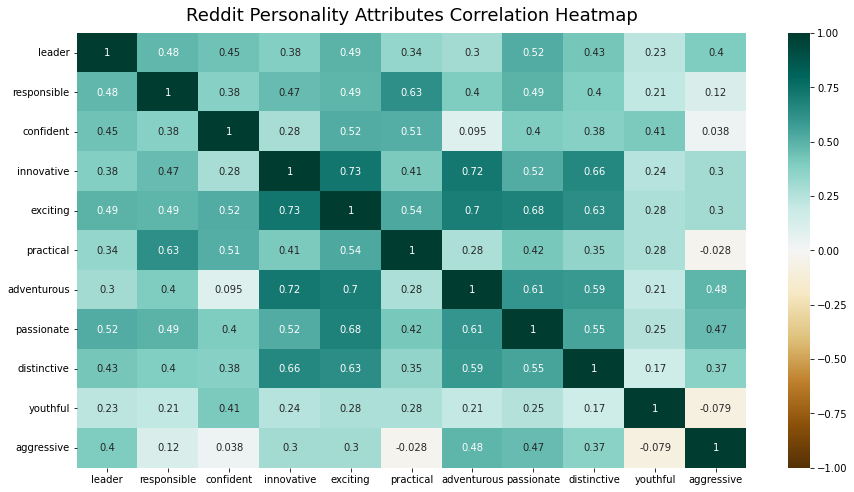

In [43]:
plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(pers_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Reddit Personality Attributes Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped

In [44]:
# save heatmap as .png file
plt.savefig('Reddit_personality_heatmap.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

# Line Plot

In [94]:
avg_fun_by_model = cmt_final_fun.groupby(['Model']).mean()
avg_fun_by_model

,dependable,lasts long,value for money,quality fit and finish,attractive styling,safe,retains resale value,driver comfort,fun to drive,advanced features,responsive handling,prestigious,dealerships,fuel efficient,quick acceleration,environmentally friendly,affordable
Model,,,,,,,,,,,,,,,,,
Bronco Sport,0.485600,0.658560,0.457961,0.565762,0.588079,0.454139,0.539831,0.400264,0.817677,0.740252,0.578962,0.480608,0.593118,0.359693,0.658391,0.329499,0.419533
CR-V,0.514909,0.633365,0.508738,0.582106,0.609125,0.404856,0.598340,0.497637,0.800750,0.725287,0.575070,0.556560,0.538303,0.312608,0.541063,0.284583,0.461976
CX-5,0.558147,0.665120,0.582455,0.689657,0.723432,0.606217,0.698519,0.535653,0.790735,0.774713,0.643796,0.564880,0.663894,0.415010,0.566057,0.361187,0.515495
Equinox,0.458822,0.600182,0.511914,0.651576,0.722939,0.413687,0.654668,0.542214,0.848227,0.741092,0.568173,0.547394,0.756085,0.369781,0.558185,0.383117,0.510097
Escape,0.459542,0.707913,0.556265,0.573596,0.662698,0.413503,0.674814,0.516094,0.822155,0.759971,0.589470,0.562459,0.621474,0.417654,0.583309,0.358982,0.494876
Forester,0.443789,0.666878,0.531124,0.570147,0.655505,0.425599,0.567830,0.460120,0.826219,0.721933,0.594180,0.519187,0.532868,0.291388,0.589376,0.290585,0.496294
RAV4,0.530190,0.692446,0.580202,0.689344,0.742555,0.526749,0.679585,0.540874,0.752990,0.773065,0.646474,0.579973,0.644754,0.462465,0.565316,0.397144,0.541225
Rogue,0.435942,0.656906,0.460196,0.549612,0.660179,0.353545,0.617441,0.524757,0.745260,0.758540,0.607002,0.497975,0.572443,0.344478,0.575433,0.312206,0.374638
Sportage,0.441125,0.718181,0.529469,0.616340,0.666870,0.436134,0.647576,0.484838,0.802520,0.770949,0.610225,0.584684,0.603870,0.412386,0.569547,0.349264,0.493354


In [95]:
# average score for each attribute
fun_attr_avg = cmt_final_fun.mean(skipna=True)

avg_fun_by_model.loc['Attri_mean'] = avg_fun_by_model.mean()
avg_fun_by_model = avg_fun_by_model.rename_axis('Attributes',axis=1)
avg_fun_by_model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Attributes,dependable,lasts long,value for money,quality fit and finish,attractive styling,safe,retains resale value,driver comfort,fun to drive,advanced features,responsive handling,prestigious,dealerships,fuel efficient,quick acceleration,environmentally friendly,affordable
Model,,,,,,,,,,,,,,,,,
Bronco Sport,0.485600,0.658560,0.457961,0.565762,0.588079,0.454139,0.539831,0.400264,0.817677,0.740252,0.578962,0.480608,0.593118,0.359693,0.658391,0.329499,0.419533
CR-V,0.514909,0.633365,0.508738,0.582106,0.609125,0.404856,0.598340,0.497637,0.800750,0.725287,0.575070,0.556560,0.538303,0.312608,0.541063,0.284583,0.461976
CX-5,0.558147,0.665120,0.582455,0.689657,0.723432,0.606217,0.698519,0.535653,0.790735,0.774713,0.643796,0.564880,0.663894,0.415010,0.566057,0.361187,0.515495
Equinox,0.458822,0.600182,0.511914,0.651576,0.722939,0.413687,0.654668,0.542214,0.848227,0.741092,0.568173,0.547394,0.756085,0.369781,0.558185,0.383117,0.510097
Escape,0.459542,0.707913,0.556265,0.573596,0.662698,0.413503,0.674814,0.516094,0.822155,0.759971,0.589470,0.562459,0.621474,0.417654,0.583309,0.358982,0.494876
Forester,0.443789,0.666878,0.531124,0.570147,0.655505,0.425599,0.567830,0.460120,0.826219,0.721933,0.594180,0.519187,0.532868,0.291388,0.589376,0.290585,0.496294
RAV4,0.530190,0.692446,0.580202,0.689344,0.742555,0.526749,0.679585,0.540874,0.752990,0.773065,0.646474,0.579973,0.644754,0.462465,0.565316,0.397144,0.541225
Rogue,0.435942,0.656906,0.460196,0.549612,0.660179,0.353545,0.617441,0.524757,0.745260,0.758540,0.607002,0.497975,0.572443,0.344478,0.575433,0.312206,0.374638
Sportage,0.441125,0.718181,0.529469,0.616340,0.666870,0.436134,0.647576,0.484838,0.802520,0.770949,0.610225,0.584684,0.603870,0.412386,0.569547,0.349264,0.493354


In [96]:
avg_fun_by_model.shape

(11, 17)

In [97]:
avg_fun_by_model_trans = avg_fun_by_model.T
avg_fun_by_model_trans

Model,Bronco Sport,CR-V,CX-5,Equinox,Escape,Forester,RAV4,Rogue,Sportage,Tucson,Attri_mean
Attributes,,,,,,,,,,,
dependable,0.485600,0.514909,0.558147,0.458822,0.459542,0.443789,0.530190,0.435942,0.441125,0.418140,0.474621
lasts long,0.658560,0.633365,0.665120,0.600182,0.707913,0.666878,0.692446,0.656906,0.718181,0.698544,0.669810
value for money,0.457961,0.508738,0.582455,0.511914,0.556265,0.531124,0.580202,0.460196,0.529469,0.593190,0.531151
quality fit and finish,0.565762,0.582106,0.689657,0.651576,0.573596,0.570147,0.689344,0.549612,0.616340,0.595303,0.608344
attractive styling,0.588079,0.609125,0.723432,0.722939,0.662698,0.655505,0.742555,0.660179,0.666870,0.659474,0.669086
safe,0.454139,0.404856,0.606217,0.413687,0.413503,0.425599,0.526749,0.353545,0.436134,0.431070,0.446550
retains resale value,0.539831,0.598340,0.698519,0.654668,0.674814,0.567830,0.679585,0.617441,0.647576,0.625438,0.630404
driver comfort,0.400264,0.497637,0.535653,0.542214,0.516094,0.460120,0.540874,0.524757,0.484838,0.513650,0.501610
fun to drive,0.817677,0.800750,0.790735,0.848227,0.822155,0.826219,0.752990,0.745260,0.802520,0.830586,0.803712


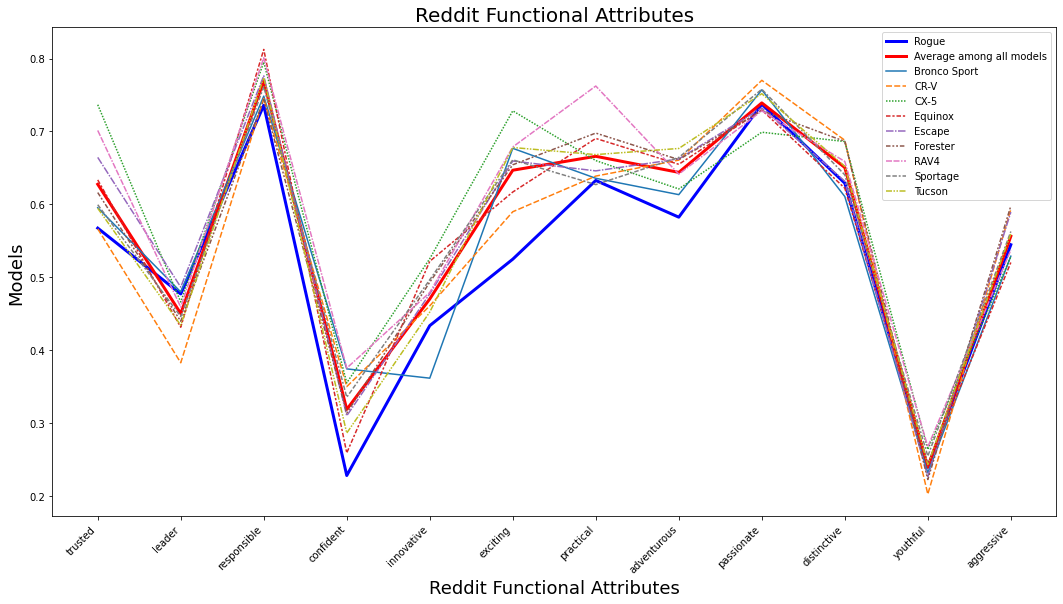

In [119]:
df = avg_fun_by_model_trans
#df[df.columns.drop(['Rogue', 'Attri_mean'])]

plt.figure(figsize=(18,9))
#make rogue and attributes average different colors
sns.lineplot(data=avg_fun_by_model_trans['Rogue'],lw=3,color = "blue")
sns.lineplot(data=avg_fun_by_model_trans['Attri_mean'],lw=3,color = "red")

#adjujst legend
sns.lineplot(data=df[df.columns.drop(['Rogue', 'Attri_mean'])])
plt.legend(labels=["Rogue","Average among all models",'Bronco Sport','CR-V','CX-5','Equinox', 'Escape','Forester','RAV4','Sportage','Tucson'])

# format x and y coordinates
plt.xticks(rotation=45, ha='right')
plt.xlabel('Reddit Functional Attributes', fontsize=18)
plt.ylabel('Models', fontsize=18)

plt.title('Reddit Functional Attributes', fontsize=20)
plt.show()

In [113]:
# save heatmap as .png file
plt.savefig('Reddit_functional_lineplot.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [62]:
avg_pers_by_model = cmt_final.iloc[:,[1,22,23,24,25,26,27,28,29,30,31,32,33]].groupby(['Model']).mean()
avg_pers_by_model

,trusted,leader,responsible,confident,innovative,exciting,practical,adventurous,passionate,distinctive,youthful,aggressive
Model,,,,,,,,,,,,
Bronco Sport,0.595385,0.479866,0.748374,0.374358,0.361617,0.676803,0.635731,0.613300,0.757022,0.610702,0.231878,0.528901
CR-V,0.566446,0.382752,0.745128,0.350044,0.460750,0.589844,0.638755,0.660635,0.770072,0.687871,0.202478,0.593003
CX-5,0.736600,0.466130,0.795074,0.355182,0.525459,0.728215,0.659997,0.621101,0.698904,0.686149,0.263939,0.528341
Equinox,0.633530,0.431473,0.812420,0.259087,0.521871,0.616866,0.690380,0.654890,0.729407,0.622110,0.240143,0.520238
Escape,0.664403,0.486494,0.776332,0.310037,0.477347,0.659419,0.645898,0.662242,0.732180,0.631632,0.226820,0.589361
Forester,0.616164,0.439686,0.743618,0.313650,0.493368,0.654255,0.697733,0.661315,0.728549,0.686355,0.222629,0.597850
RAV4,0.701339,0.459073,0.800990,0.375438,0.479144,0.678689,0.762258,0.641417,0.728142,0.658766,0.267544,0.537400
Rogue,0.567377,0.477142,0.735797,0.228122,0.433652,0.524803,0.632763,0.582397,0.737313,0.629029,0.239887,0.544623
Sportage,0.599477,0.446153,0.761392,0.335485,0.496587,0.661056,0.627081,0.664311,0.757798,0.640428,0.254678,0.562740


In [108]:
# average score for each attribute
pers_attr_avg = cmt_final_pers.mean(skipna=True)

avg_pers_by_model.loc['Attri_mean'] = avg_pers_by_model.mean()
avg_pers_by_model = avg_pers_by_model.rename_axis('Attributes',axis=1)
avg_pers_by_model_trans = avg_pers_by_model.T
avg_pers_by_model_trans

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Model,Bronco Sport,CR-V,CX-5,Equinox,Escape,Forester,RAV4,Rogue,Sportage,Tucson,Attri_mean
Attributes,,,,,,,,,,,
trusted,0.595385,0.566446,0.736600,0.633530,0.664403,0.616164,0.701339,0.567377,0.599477,0.594617,0.627534
leader,0.479866,0.382752,0.466130,0.431473,0.486494,0.439686,0.459073,0.477142,0.446153,0.434186,0.450296
responsible,0.748374,0.745128,0.795074,0.812420,0.776332,0.743618,0.800990,0.735797,0.761392,0.773575,0.769270
confident,0.374358,0.350044,0.355182,0.259087,0.310037,0.313650,0.375438,0.228122,0.335485,0.286330,0.318773
innovative,0.361617,0.460750,0.525459,0.521871,0.477347,0.493368,0.479144,0.433652,0.496587,0.452309,0.470211
exciting,0.676803,0.589844,0.728215,0.616866,0.659419,0.654255,0.678689,0.524803,0.661056,0.677929,0.646788
practical,0.635731,0.638755,0.659997,0.690380,0.645898,0.697733,0.762258,0.632763,0.627081,0.668215,0.665881
adventurous,0.613300,0.660635,0.621101,0.654890,0.662242,0.661315,0.641417,0.582397,0.664311,0.676641,0.643825
passionate,0.757022,0.770072,0.698904,0.729407,0.732180,0.728549,0.728142,0.737313,0.757798,0.751762,0.739115


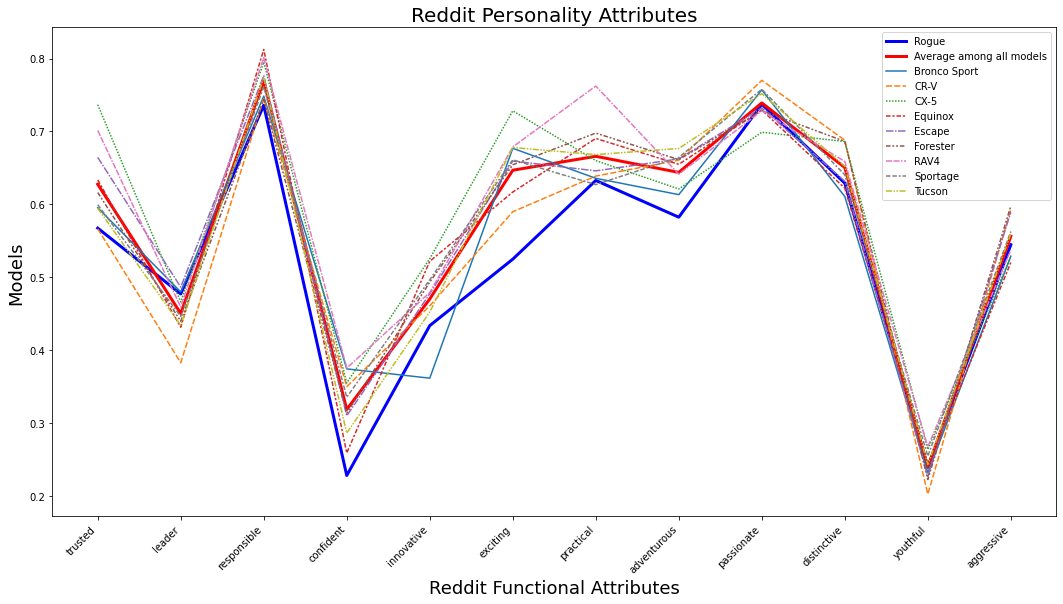

In [120]:
df = avg_pers_by_model_trans
#df[df.columns.drop(['Rogue', 'Attri_mean'])]

plt.figure(figsize=(18,9))
#make rogue and attributes average different colors
sns.lineplot(data=avg_pers_by_model_trans['Rogue'],lw=3,color = "blue")
sns.lineplot(data=avg_pers_by_model_trans['Attri_mean'],lw=3,color = "red")

#adjujst legend
sns.lineplot(data=df[df.columns.drop(['Rogue', 'Attri_mean'])])
plt.legend(labels=["Rogue","Average among all models",'Bronco Sport','CR-V','CX-5','Equinox', 'Escape','Forester','RAV4','Sportage','Tucson'])

# format x and y coordinates
plt.xticks(rotation=45, ha='right')
plt.xlabel('Reddit Functional Attributes', fontsize=18)
plt.ylabel('Models', fontsize=18)

#set title
plt.title('Reddit Personality Attributes', fontsize=20)
plt.show()

In [115]:
# save heatmap as .png file
plt.savefig('Reddit_personality_lineplot.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>